#### La suposición de noramlidad es importante para muchos modelos-
- Examinar con parcelas:
    - qqplots
    - diagrama de caja
- Prueba con estadísticas:
    - La prueba de Shapiro-Wilk;
    - La prueba de Anderson-Darling y;
    - La prueba de Kolmogorov-Smirnov.
  Prueba # Kolmogorov-Smirnov
#### La prueba de KS utilizó CDF observadas / empíricas para las comparaciones: **
- Utiliza CDF para comparar datos con:
    - una distribución normal ideal para una prueba KS de una muestra
    - u otra población para una prueba KS de dos muestras.
- Similar a la prueba t pero es sensible a cambios en la media, varianza y forma de los datos.
    
<img src = "https://www.dropbox.com/s/jle5rdzan84qmfj/d.gif?raw=1" width = 400>

- ** Función de distribución empírica: **
    - Si X es una variable aleatoria con CDF $ F (x) = P (X≤x) $ <br>
      y $ x1,…, xn $ son i.i.d. Variables aleatorias muestreadas a partir de la función de distribución empírica X.


$$\hat{F}(x) = \frac{\text{# of elements in sample} \leq x}{n} = \frac{1}{n} \Sigma_{i=1}^n I(x_i \leq x) \tag{1}$$

#### Prueba KS de una muestra
- Debe proporcionar una función de distribución teórica completamente especificada
- Sensible a la media, la varianza, la forma.
- Se utiliza para probar el supuesto de normalidad.
$$
d = max (abs [F_0 (X) -F_r (X)])
$$
dónde
- ** d ** es la desviación máxima del estadístico de Kolmogorov
- ** F <sub> 0 </sub> (X) ** = (No de observaciones ≤ X) / (No total de observaciones) es decir, la distribución empírica no paramétrica
- ** F <sub> r </sub> (X) ** = La distribución de frecuencia teórica de X - paramétrica (por ejemplo, basada en el valor medio)



In [4]:
from scipy.stats import norm
from scipy.special import kolmogorov
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [7]:


# Set style
plt.style.use('ggplot')

# Start with shaprio

# mean = loc, scale = sd, size = n
x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)


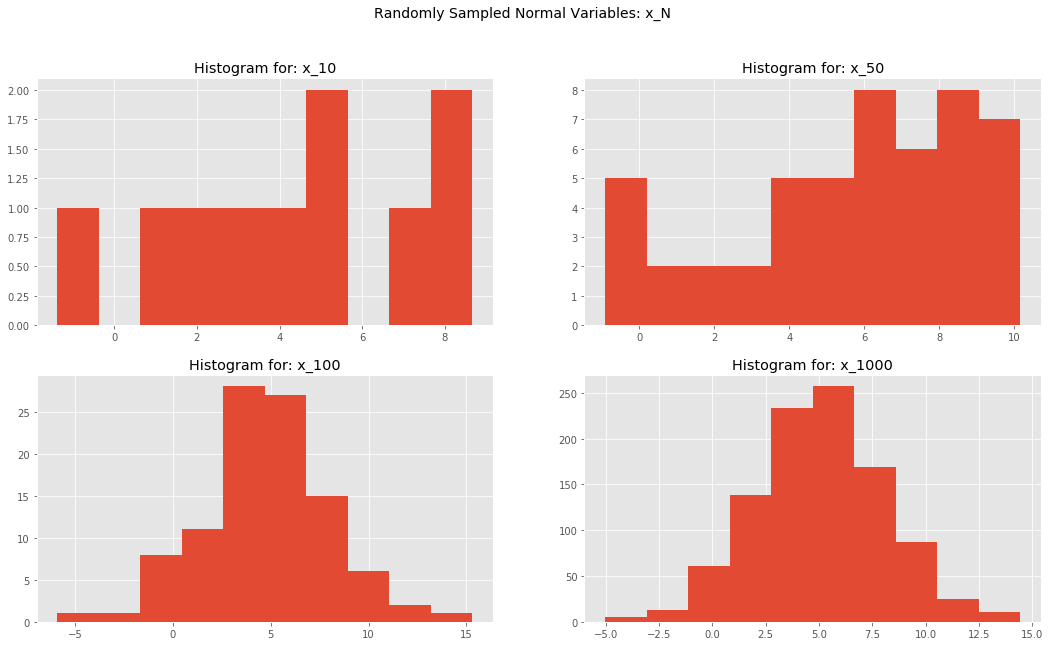

(0.9609075784683228, 0.7961709499359131)
Don't reject normality hypothesis
For x_10:  None
Reject normality hypothesis
For x_50:  None
Don't reject normality hypothesis
For x_100:  None
Don't reject normality hypothesis
For x_1000:  None


In [11]:
def four_plots():
    plt.subplot(2, 2, 1)
    plt.hist(x_10)
    plt.title('Histogram for: x_10')
    plt.subplot(2, 2, 2)
    plt.hist(x_50)
    plt.title('Histogram for: x_50')
    plt.subplot(2, 2, 3)
    plt.hist(x_100)
    plt.title('Histogram for: x_100')
    plt.subplot(2, 2, 4)
    plt.hist(x_1000)
    plt.title('Histogram for: x_1000')
    plt.suptitle('Randomly Sampled Normal Variables: x_N', fontsize=14)
    plt.show()
    

plt.figure(figsize=(18,10))
four_plots()

# Perform test
print(stats.shapiro(x_10))

def accept_reject(shaprio):
    if shaprio[1] > .05 :
        print("Don't reject normality hypothesis")
    else:
        print("Reject normality hypothesis")

print("For x_10: ", accept_reject(stats.shapiro(x_10)))
print( "For x_50: ",  accept_reject(stats.shapiro(x_50)))
print ("For x_100: ",  accept_reject(stats.shapiro(x_100)))
print ("For x_1000: ",  accept_reject(stats.shapiro(x_1000)))

Text(0.5, 1.0, 'Histogram of a Bimodal Distrubtion')

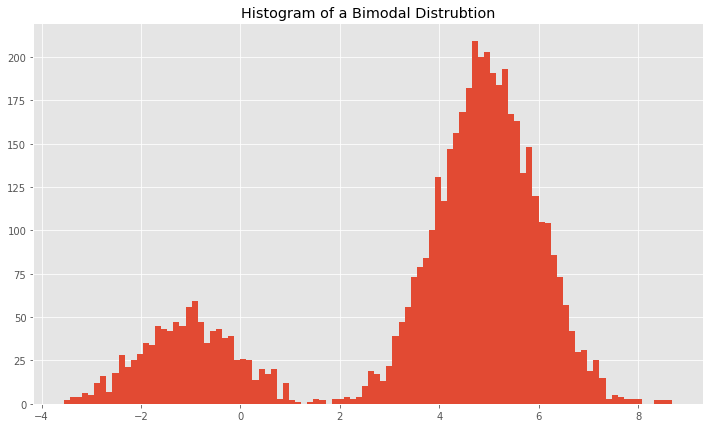

In [42]:
# Create a bimodal dataset
N = 10000
x_bimodal = np.concatenate((np.random.normal(-1, 1, int(0.1 * N)),
                    np.random.normal(5, 1, int(0.4 * N))))

# Plot the bimodal data
plt.figure(figsize=(12, 7))
res = plt.hist(x_bimodal, bins=100)
plt.title("Histogram of a Bimodal Distrubtion")



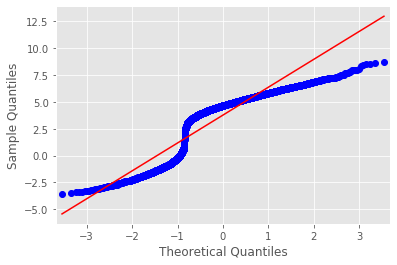

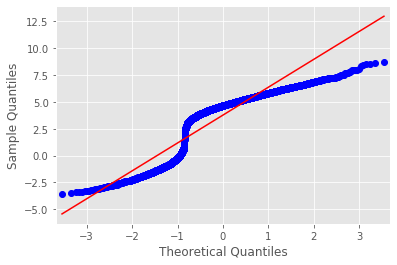

In [44]:
import statsmodels.api as sm

# QQ Plots for the bimodal data
sm.qqplot(x_bimodal, line='s')



In [45]:

X=x_bimodal
print(stats.kstest(X, 'norm'))

KstestResult(statistic=0.7902122419323123, pvalue=0.0)


In [47]:
X=(x_bimodal-np.mean(x_bimodal))/np.mean(x_bimodal)
# Get CDF for X, this may not be the most effective or elegant way to do this:
percentiles = np.arange(0,1,(1.0-0.0)/len(X))*100.0
CDF_X=[]; Values=[]
for percentile in percentiles:
    Values.append(np.percentile(X,percentile))
    CDF_X.append(percentile/100.0)
CDF_X=np.array(CDF_X)
Values=np.array(Values)


# CDF for a normal distribution, using the same points as for X
rv = norm()
CDF_A = rv.cdf(Values)

# Get the maximum distance between the two distributions:
KS_statistic = (CDF_X - CDF_A).max()
# Get the index for the max. between the two distributions, for plotting
KS_index = (CDF_X - CDF_A).argmax()

# Get the pvalue from the corresonding scipy function:
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.special.kolmogorov.html
pvalue=kolmogorov(np.sqrt(len(X))*KS_statistic)
print("KS statistic = {}".format(KS_statistic))
print("pvalue = {}".format(pvalue))

KS statistic = 0.18882415011368514
pvalue = 2.852625884537881e-155


In [53]:
X=x_100 
# Get CDF for X, this may not be the most effective or elegant way to do this:
percentiles = np.arange(0,1,(1.0-0.0)/len(X))*100.0
CDF_X=[]; Values=[]
for percentile in percentiles:
    Values.append(np.percentile(X,percentile))
    CDF_X.append(percentile/100.0)
CDF_X=np.array(CDF_X)
Values=np.array(Values)


# CDF for a normal distribution, using the same points as for X
rv = norm()
CDF_A = rv.cdf(Values)

# Get the maximum distance between the two distributions:
KS_statistic = (CDF_X - CDF_A).max()
# Get the index for the max. between the two distributions, for plotting
KS_index = (CDF_X - CDF_A).argmax()

# Get the pvalue from the corresonding scipy function:
# https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.special.kolmogorov.html
pvalue=kolmogorov(np.sqrt(len(X))*KS_statistic)
print("KS statistic = {}".format(KS_statistic))
print("pvalue = {}".format(pvalue))

KS statistic = -1.8263610538361099e-09
pvalue = 1.0


#### Prueba KS de dos muestras
- comprueba si se han extraído dos muestras ** independientes ** de la misma población o, de forma equivalente, de dos poblaciones idénticas ($X = Y$).
- compara dos distribuciones de ** muestra ** (en lugar de teóricas)

$$ d = max [abs [{F_ {n1} (X) -F_ {n2} (X)}]] $$
- $ n_1 $ = Observaciones de la primera muestra.

- $ n_2 $ = Observaciones del segundo muestreo


##### Interpretación de d estadísticas
- Cuando el CDF muestra una gran desviación máxima, d refleja la diferencia entre las dos distribuciones de la muestra.
    - Valor crítico de d para muestras donde n1 = n2 y es ≤ 40, se utiliza la tabla K-S para el caso de dos muestras.
    - Cuando n1 y / o n2> 40, se debe utilizar la tabla K-S para muestras grandes de prueba de dos muestras.
- Se acepta la hipótesis nula si el valor calculado es menor que el valor de la tabla y viceversa.

In [66]:
from scipy import stats

np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample
n3 = 100  # size of second sample


rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)

rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)

rvs3 = stats.norm.rvs(size=n3,  loc=0., scale=1)

In [67]:

stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.20833333333333334, pvalue=5.129279597815284e-05)

In [68]:
stats.ks_2samp(rvs1, rvs3 )

Ks_2sampResult(statistic=0.105, pvalue=0.44546367341695026)